<a href="https://colab.research.google.com/github/sfaril12/renewable_energy_clasification_dataset/blob/main/Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Data Sample:
  Region Energy_Source  Temperature_C  Wind_Speed_m_s  Solar_Radiation_kWh_m2  \
0  North         Hydro      13.820937       14.362462                8.834648   
1  North         Solar      36.972782       19.110474                4.483191   
2   East         Hydro      33.972875        0.364652                5.104325   
3  South         Solar      -2.965160        3.915560                6.265925   
4  North          Wind      -3.813486        0.151257                9.263826   

   Rainfall_mm  Season  Efficiency_Ratio  Lagged_Production_MWh  \
0     3.350827  Winter        125.449109            1419.514155   
1    48.767157  Winter         16.325089            4769.329958   
2    40.848695  Winter        155.637061            1005.077719   
3    42.627371  Spring        675.516566            6294.250931   
4    46.898262  Spring        626.048277            5550.263638   

   Combined_Weather_Index Energy_Class  
0                1.565158       Medium  
1             

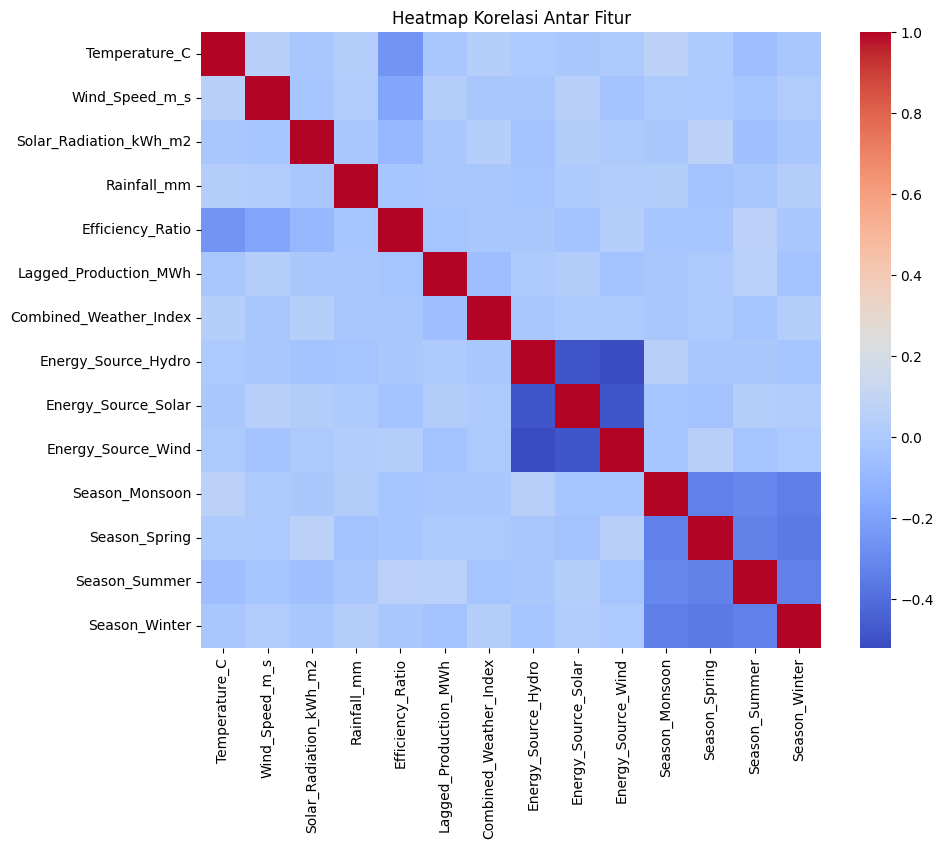


 Korelasi tertinggi Combined_Weather_Index: 0.064

 Fitur setelah Standardisasi:
   Temperature_C  Wind_Speed_m_s  Solar_Radiation_kWh_m2  Rainfall_mm  \
0      -0.310483        0.783476                1.210354    -1.450367   
1       1.468125        1.653812               -0.179260     1.707487   
2       1.236132       -1.653463                0.168143     1.146090   
3      -1.470444       -1.131262                0.515547     1.286439   
4      -1.547775       -1.653463                1.557757     1.567138   

   Efficiency_Ratio  Lagged_Production_MWh  Combined_Weather_Index  \
0         -0.183418              -1.269661                0.046226   
1         -0.364115              -0.089994                0.024432   
2         -0.133685              -1.415447                0.024432   
3          0.728358               0.447019               -0.084541   
4          0.647127               0.185027               -0.040952   

   Energy_Source_Hydro  Energy_Source_Solar  Energy_Source

In [ ]:
# ============================================
#  TAHAP 1: Data Collection
# ============================================

import pandas as pd

# Masukkan link dataset GitHub kamu di sini
url = "https://raw.githubusercontent.com/sfaril12/renewable_energy_clasification_dataset/refs/heads/main/Renewable_Energy_Data.csv"

# Membaca dataset
df = pd.read_csv(url)

# Menampilkan 5 data teratas
print(" Data Sample:")
print(df.head())

# Mengecek missing value
print("\n Cek Missing Value:")
print(df.isnull().sum())

# Mengecek tipe data
print("\n Tipe Data Tiap Kolom:")
print(df.dtypes)


# ============================================
#  TAHAP 2: Data Preparation
# ============================================

# Hapus kolom yang kurang relevan (berdasarkan analisis Kaggle)
if 'Region' in df.columns:
    df = df.drop(columns=['Region'])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Energy_Class'])
y = df['Energy_Class']

# Identifikasi kolom kategorikal
categorical_cols = ['Energy_Source', 'Season']

# One-Hot Encoding pada kolom kategorikal
X = pd.get_dummies(X, columns=categorical_cols, drop_first=False)

# Ubah nilai True/False jadi 1/0
X = X.astype(int)

# Cek hasil setelah encoding
print("\n Fitur setelah One-Hot Encoding:")
print(X.head())


# ============================================
#  TAHAP 3: Feature Engineering
# ============================================

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# --- (1) Cek korelasi antar fitur numerik ---
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

# Jika Combined_Weather_Index sangat berkorelasi dengan fitur lain, bisa dihapus
corr_matrix = X.corr()
if 'Combined_Weather_Index' in X.columns:
    corr_with_combined = corr_matrix['Combined_Weather_Index'].drop('Combined_Weather_Index')
    max_corr = corr_with_combined.abs().max()
    print(f"\n Korelasi tertinggi Combined_Weather_Index: {max_corr:.3f}")
    if max_corr > 0.9:
        print(" Menghapus Combined_Weather_Index karena korelasi tinggi.")
        X = X.drop(columns=['Combined_Weather_Index'])

# --- (2) Standardisasi fitur numerik ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

print("\n Fitur setelah Standardisasi:")
print(X.head())

# --- (3) Encoding label target (Energy_Class) ---
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("\n Label Encoding Energy_Class:")
for i, cls in enumerate(encoder.classes_):
    print(f"   {cls} → {i}")

# --- (4) Split Data Train dan Test ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

print(f"\n Dataset siap! Ukuran data:")
print(f"   X_train: {X_train.shape}")
print(f"   X_test: {X_test.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   y_test: {y_test.shape}")

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4306 - loss: 1.1061 - val_accuracy: 0.4875 - val_loss: 1.0428
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4438 - loss: 1.0352 - val_accuracy: 0.5000 - val_loss: 1.0185
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4241 - loss: 1.0465 - val_accuracy: 0.5125 - val_loss: 1.0039
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4940 - loss: 1.0042 - val_accuracy: 0.5125 - val_loss: 0.9919
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4870 - loss: 0.9938 - val_accuracy: 0.5188 - val_loss: 0.9787
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4969 - loss: 0.9793 - val_accuracy: 0.5375 - val_loss: 0.9713
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4965 - loss: 0.9593 - val_accuracy: 0.5562 - val_loss: 0.9657
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5293 - loss: 0.9548 - val_accuracy: 0.5750 - val_loss: 0.9

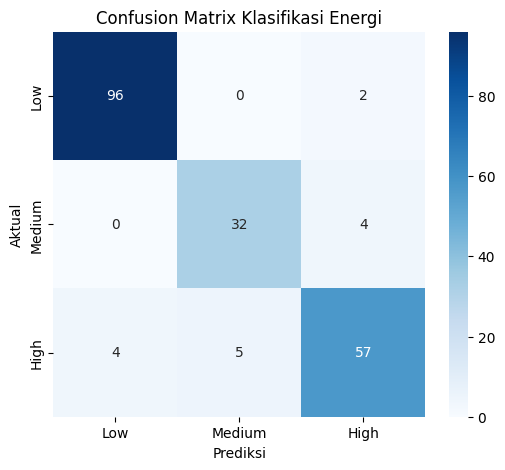

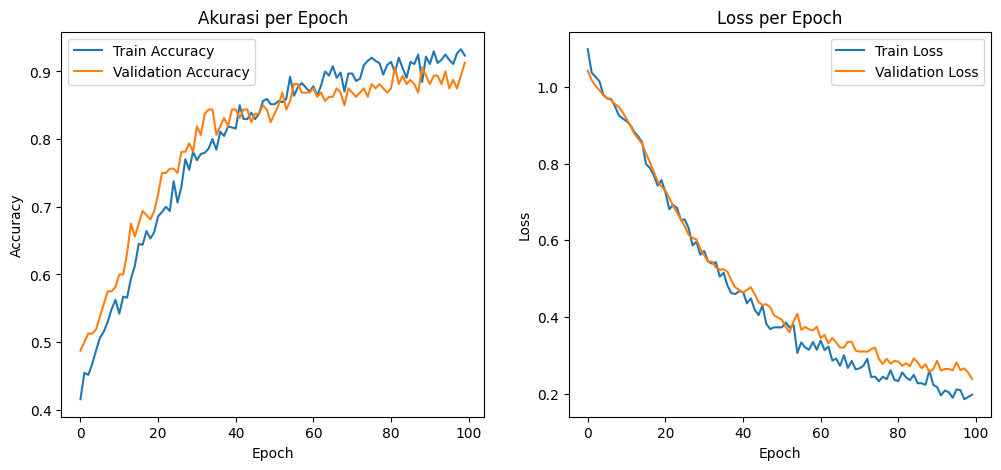

In [ ]:
# ============================================
#  TAHAP 4: Model Training (Neural Network)
# ============================================

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# --- (1) Ubah label menjadi One-Hot Encoding ---
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# --- (2) Arsitektur Neural Network ---
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),   # Hidden layer 1
    Dropout(0.3),                                              # Dropout untuk mencegah overfitting
    Dense(32, activation='relu'),                              # Hidden layer 2
    Dropout(0.2),
    Dense(num_classes, activation='softmax')                   # Output layer (3 kelas: low, medium, high)
])

# --- (3) Kompilasi Model ---
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- (4) Early Stopping (opsional, untuk efisiensi) ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# --- (5) Latih Model ---
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


# ============================================
#  TAHAP 5: Model Evaluation
# ============================================

# (1) Evaluasi performa model
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"\n Akurasi Model di Data Uji: {accuracy*100:.2f}%")
print(f" Loss: {loss:.4f}")

# (2) Prediksi dan laporan klasifikasi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\n Laporan Klasifikasi:")
print(classification_report(y_test, y_pred_classes, target_names=['Low', 'Medium', 'High']))

# (3) Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Klasifikasi Energi')
plt.show()

# (4) Grafik Akurasi & Loss per Epoch
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
url = "https://raw.githubusercontent.com/sfaril12/renewable_energy_clasification_dataset/refs/heads/main/Renewable_Energy_Data.csv"

df=pd.read_csv(url)
df.tail(10)

,Region,Energy_Source,Temperature_C,Wind_Speed_m_s,Solar_Radiation_kWh_m2,Rainfall_mm,Season,Efficiency_Ratio,Lagged_Production_MWh,Combined_Weather_Index,Energy_Class
990,West,Wind,16.563184,15.290556,8.026403,25.685393,Monsoon,14.836996,5235.603686,1.327604,Low
991,South,Wind,-3.846107,11.470579,9.972379,14.409226,Spring,129.339086,606.538514,-7.534136,Medium
992,North,Wind,10.356152,19.120943,0.300260,0.323218,Winter,161.508911,2405.299713,1.710192,Medium
993,South,Wind,12.108803,4.009490,8.973659,24.811961,Winter,121.544349,4970.817121,0.990415,Medium
994,South,Solar,12.947025,2.185284,6.226305,14.281299,Monsoon,84.954262,3171.329309,0.603110,Low
995,East,Solar,21.107757,17.079239,9.733826,36.730415,Monsoon,104.064382,1899.459618,1.212835,High
996,North,Hydro,19.012115,8.782996,4.650095,1.197313,Winter,98.543778,5090.915135,0.671248,Medium
997,North,Hydro,22.355729,16.939377,8.473879,29.241391,Winter,54.445784,3295.816955,1.088095,Medium
998,East,Hydro,29.419747,17.861804,0.623941,47.073712,Summer,95.969910,2655.265667,0.607689,Medium
999,South,Hydro,31.584358,1.249152,3.352791,8.720463,Winter,38.173040,4693.455633,0.141232,Low
